In [0]:
# stack, concatenate, reshape, indexing
# stack(배열들을 하나로) 쌓는다. 차원이 1 증가한다.
a = np.arange(12).reshape(3, 4)
b = a
c = np.stack((a, b, a, b), axis=2)
c.shape

(3, 4, 4)

In [0]:
# concatenate(잇다 붙이다)
# 차원이 증가하지 않는다.
a = np.arange(12).reshape(3, 4)
b = a
c = np.concatenate((a, b), axis=0)
c.shape

(6, 4)

In [0]:
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [0]:
# reshape
c.reshape(3, 4, -1)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11],
        [ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [0]:
# indexing
# 데이터 뽑기
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [0]:
a[-1, 2]

10

In [0]:
# slicing
a[0:2, 1]

array([1, 5])

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import random
from skimage.transform import rotate

In [43]:
x, y = load_digits(return_X_y=True)
x = np.reshape(x, [-1, 8, 8])
x.shape, y.shape, set(y)

((1797, 8, 8), (1797,), {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})

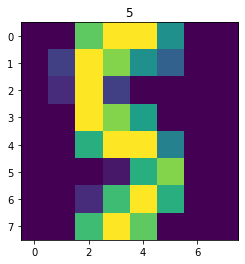

In [48]:
plt.title(y[102])
plt.imshow(x[102])

In [0]:
m = len(y) // 2 # 훈련, 테스트 데이터 반으로 나누기 위해 사용하는 숫자
x_train = x[:m]
y_train = y[:m]
x_test = x[m:m*2]
y_test = y[m:m*2]

In [57]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((898, 8, 8), (898,), (898, 8, 8), (898,))

train data 증식하기 - 각도 조절

In [0]:
x_train_angle = []
y_train_angle = []

for idx, image in enumerate(x_train):
  angle = random.randrange(-20, 20)
  img = np.array(image)
  img = rotate(img, angle)
  x_train_angle.append(np.round(img))
  y_train_angle.append(y_train[idx])

In [61]:
x_train = np.vstack((x_train, x_train_angle))
y_train = np.concatenate((y_train, y_train_angle))
y_train = np.reshape(y_train, [-1, 1])
x_train.shape, y_train.shape

((1796, 8, 8), (1796, 1))

In [62]:
BLANK = 10
x_train_blank = np.concatenate((x_train, np.zeros_like(x_train)), axis=2)
y_train_blank = np.concatenate((y_train, np.zeros_like(y_train)+BLANK), axis=1)
x_train_blank.shape, y_train_blank.shape

((1796, 8, 16), (1796, 2))

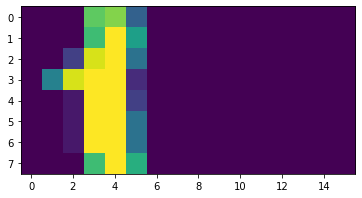

In [64]:
plt.imshow(x_train_blank[1])

In [0]:
x_train_lr = []
y_train_lr = []

for _ in range(len(y_train_blank)):
  rnd1 = random.randrange(0, len(x)-1)
  rnd2 = random.randrange(0, len(x)-1)

  x_train_lr.append(np.reshape(np.stack((x[rnd1], x[rnd2]), axis=1), [8, 16]))
  y_train_lr.append([y[rnd1], y[rnd2]])

x_train_lr = np.array(x_train_lr)
y_train_lr = np.array(y_train_lr)

In [69]:
x_train_lr.shape, y_train_lr.shape

((1796, 8, 16), (1796, 2))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


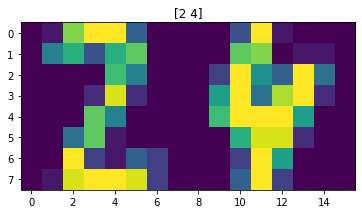

In [71]:
plt.title(y_train_lr[0])
plt.imshow(x_train_lr[0])

In [72]:
x_train_set = np.concatenate((x_train_blank, x_train_lr), axis=0)
y_train_set = np.concatenate((y_train_blank, y_train_lr), axis=0)
x_train_set.shape, y_train_set.shape

((3592, 8, 16), (3592, 2))

In [0]:
# x_train_lr = []
# y_train_lr = []
# for idx in range(len(y_train)//2):
#   x_train_lr.append(np.concatenate((x_train[idx*2], x_train[idx*2+1]), axis=1))
#   y_train_lr.append(np.concatenate((y_train[idx*2], y_train[idx*2+1])))
#   x_train_lr.append(np.concatenate((x_train[idx*2+1], x_train[idx*2]), axis=1))
#   y_train_lr.append(np.concatenate((y_train[idx*2+1], y_train[idx*2])))

In [0]:
# x_train_lr = np.array(x_train_lr)
# y_train_lr = np.array(y_train_lr)
# x_train_lr.shape, y_train_lr.shape

((1796, 8, 16), (1796, 2))

In [0]:
# x_train_set = np.vstack((x_train_blank, x_train_lr))
# y_train_set = np.vstack((y_train_blank, y_train_lr))
# x_train_set.shape, y_train_set.shape

((3592, 8, 16), (3592, 2))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


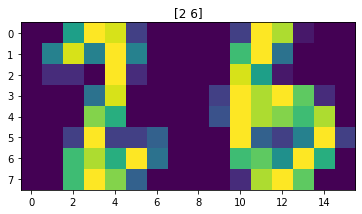

In [75]:
# 확인용
plt.title(y_train_set[3003])
plt.imshow(x_train_set[3003])

In [76]:
random_idx = [x for x in range(len(y_train_set))]
random.shuffle(random_idx)
random_idx[:10]

[2186, 253, 2115, 1003, 2615, 3286, 1214, 1181, 747, 1510]

In [0]:
x_train_shuffle = []
y_train_shuffle = []

for idx in random_idx:
  x_train_shuffle.append(x_train_set[idx])
  y_train_shuffle.append(y_train_set[idx])

이미지를 2개씩 좌우로 붙여 합성 데이터를 만든다

In [79]:
x_test_l, x_test_r = np.split(x_test, 2, axis=0) 
x_test_lr = np.concatenate((x_test_l, x_test_r), axis=2)
y_test_l, y_test_r = np.split(y_test, 2, axis=0) 
y_test = np.stack((y_test_l, y_test_r), -1)
x_test_lr.shape, y_test.shape

((449, 8, 16), (449, 2))

In [80]:
BLANK = 10 #'없음' 을 나타내는 기호
x_test_blank = np.concatenate((x_test_l, np.zeros_like(x_test_r)), axis=2)
y_test_blank = np.stack((y_test_l, np.zeros_like(y_test_l) + BLANK), 1)#좌측 영상의 y와 빈 영상의 y를 통합

x_test_set = np.concatenate((x_test_lr, x_test_blank), 0)# 두자리수 영상과 한자리수 영상을 통합
y_test_set = np.concatenate((y_test, y_test_blank), 0)#두자리수 y와 한자리수 y 를 통합
x_test_set.shape, y_test_set.shape

((898, 8, 16), (898, 2))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


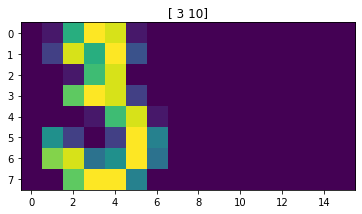

In [81]:
plt.title(y_test_set[501])
plt.imshow(x_test_set[501])

In [0]:
# class MyModel(keras.Model): # github.com/sogangori/choongang20/ 
#   def __init__(self):    
#     super(MyModel, self).__init__()
#     self.k = 10+1 # 클래스 갯수 
#     self.seq = 2 # 자릿수
#     self.opt = tf.optimizers.Adam(learning_rate=0.0001,amsgrad=True)#Stochatic Gradient Descent 확률적 경사 하강
#     self.conv0 = keras.layers.Conv2D(64, [3,3], padding='same', activation=keras.activations.relu)
#     self.conv1 = keras.layers.Conv2D(32, [3,3], padding='same', activation=keras.activations.relu)
#     self.pool0 = keras.layers.MaxPool2D([2,2], padding='same')
#     self.pool1 = keras.layers.MaxPool2D([2,2], padding='same')
#     self.flatten = keras.layers.Flatten()
#     self.dense0 = keras.layers.Dense(units=128)
#     self.dense1 = keras.layers.Dense(units=self.k * self.seq)
#     self.drop0 = keras.layers.Dropout(0.5)
#     self.drop1 = keras.layers.Dropout(0.4)
  
#   def call(self, x):
#     #x (1797, 64)
#     x_4d = tf.reshape(x, [-1,8,8*2,1]) 
#     x_4d = tf.cast(x_4d, tf.float32)
#     net = self.conv0(x_4d)
#     net = self.pool0(net)
#     net = self.conv1(net)
#     net = self.pool1(net)
#     net = self.flatten(net)
#     net = self.drop0(net)    
#     net = self.dense0(net)
#     net = self.drop1(net)
#     h = self.dense1(net)
#     h = tf.reshape(h, [-1, self.seq, self.k]) # 2:두자리수, 10:10개의 클래스 
#     h = tf.nn.softmax(h, axis=2)
#     return h

#   def get_loss(self, y, h):
#     #학습할때 nan이 발생하는 경우 값을 clip(자르다) (최소값, 최대값) 
#     h = tf.clip_by_value(h, 1e-8, 1 - 1e-8) # h 가 0이나 1이 되지 않도록 하는 안전장치 
#     cross_entropy = - (y * tf.math.log(h) + (1 - y) * tf.math.log(1 - h)) 
#     loss = tf.reduce_mean(cross_entropy)
#     return loss

#   def get_accuracy(self, y, h):    
#     predict = tf.argmax(h, -1)
#     is_equal = tf.equal(y, predict)
#     self.acc = tf.reduce_mean(tf.cast(is_equal, tf.float32)) # True > 1, False > 0 로 cast
#     self.acc_all = tf.reduce_mean(tf.cast(tf.reduce_all(is_equal, axis=1), tf.float32))

#   def fit(self, x, y, epoch=1):
#     # x : (m, 8, 16), y: (m, 2)    
#     y_hot = tf.one_hot(y, depth=self.k, axis=-1)#(m, 2, 10)  
#     for i in range(epoch):
#       with tf.GradientTape() as tape: #경사 기록 장치
#         h = self.call(x)
#         loss = self.get_loss(y_hot, h)        
#       grads = tape.gradient(loss, self.trainable_variables) #경사 계산
#       grads = [(tf.clip_by_value(grad, -5.0, 5.5)) for grad in grads] 
#       self.opt.apply_gradients(zip(grads, self.trainable_variables)) # 가중치에서 경사를 빼기
#       self.get_accuracy(y, h)
#       if i%10==0:
#         print('%d/%d loss:%.3f acc:%.3f acc_all:%.3f'%(i, epoch, loss, self.acc, self.acc_all))
# model = MyModel()

In [0]:
class MyModel(keras.Model): # github.com/sogangori/choongang20/ 
  def __init__(self):    
    super(MyModel, self).__init__()
    self.k = 10+1 # 클래스 갯수 
    self.seq = 2 # 자릿수
    self.opt = tf.optimizers.Adam(learning_rate=0.0001,amsgrad=True)#Stochatic Gradient Descent 확률적 경사 하강
    self.conv0 = keras.layers.Conv2D(64, [3,3], padding='same', activation=keras.activations.relu)
    self.conv1 = keras.layers.Conv2D(32, [3,3], padding='same', activation=keras.activations.relu)
    self.pool0 = keras.layers.MaxPool2D([2,2], padding='same')
    self.pool1 = keras.layers.MaxPool2D([2,2], padding='same')
    self.flatten = keras.layers.Flatten()
    self.dense0 = keras.layers.Dense(units=128)
    self.dense1 = keras.layers.Dense(units=self.k * self.seq)
    self.drop0 = keras.layers.Dropout(0.5)
    self.drop1 = keras.layers.Dropout(0.4)
  
  def call(self, x):
    #x (1797, 64)
    x_4d = tf.reshape(x, [-1,8,8*2,1]) 
    x_4d = tf.cast(x_4d, tf.float32)
    net = self.conv0(x_4d)
    net = self.pool0(net)
    net = self.conv1(net)
    net = self.pool1(net)
    net = self.flatten(net)
    net = self.drop0(net)    
    net = self.dense0(net)
    net = self.drop1(net)
    h = self.dense1(net)
    h = tf.reshape(h, [-1, self.seq, self.k]) # 2:두자리수, 10:10개의 클래스 
    h = tf.nn.softmax(h, axis=2)
    return h

model = MyModel()

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables) # loss에 대한 파라미터들의 도함수
  # list of (gradients, variables) pairs
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)
  
  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_set, y_train_set)).shuffle(10000).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((x_test_set, y_test_set)).shuffle(10000).batch(64)

In [101]:
EPOCHS = 100

for epoch in range(EPOCHS):

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'

  if epoch % 10 == 0:
    print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

에포크: 1, 손실: 1.072885513305664, 정확도: 67.27449798583984, 테스트 손실: 0.3046645224094391, 테스트 정확도: 92.26058197021484
에포크: 11, 손실: 0.13185551762580872, 정확도: 96.1264877319336, 테스트 손실: 0.06266213208436966, 테스트 정확도: 98.19801330566406
에포크: 21, 손실: 0.07024495303630829, 정확도: 97.95179748535156, 테스트 손실: 0.04109383746981621, 테스트 정확도: 98.78831481933594
에포크: 31, 손실: 0.04768639802932739, 정확도: 98.61250305175781, 테스트 손실: 0.032496362924575806, 테스트 정확도: 99.01214599609375
에포크: 41, 손실: 0.03609299287199974, 정확도: 98.95092010498047

In [0]:
# 테스트셋의 성능
h = model(x_test_set)
model.get_accuracy(y_test_set, h)
model.acc, model.acc_all


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



(<tf.Tensor: shape=(), dtype=float32, numpy=0.95100224>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.9075724>)

RNN

In [0]:
class MyModel(keras.Model): # github.com/sogangori/choongang20/ 
  def __init__(self):    
    super(MyModel, self).__init__()
    self.k = 10+1 # 클래스 갯수 
    self.seq = 2 # 자릿수
    self.opt = tf.optimizers.Adam(learning_rate=0.001)#Stochatic Gradient Descent 확률적 경사 하강
    # self.conv0 = keras.layers.Conv2D(16, [3,3], padding='same', activation=keras.activations.relu)
    # self.conv1 = keras.layers.Conv2D(32, [3,3], padding='same', activation=keras.activations.relu)
    self.conv0 = keras.layers.Conv2D(16, [3,3], padding='same')
    self.conv1 = keras.layers.Conv2D(32, [3,3], padding='same')
    self.pool0 = keras.layers.MaxPool2D([2,2], padding='same')
    self.pool1 = keras.layers.MaxPool2D([2,2], padding='same')    
    # self.rnn = keras.layers.LSTM(units=self.k, return_sequences=True)
    self.rnn = keras.layers.GRU(units=self.k, return_sequences=True)
    self.batch = keras.layers.BatchNormalization()
    self.act = keras.layers.ReLU()
  
  def call(self, x):
    #x (1797, 64)
    x_4d = tf.reshape(x, [-1,8,8*2,1]) 
    x_4d = tf.cast(x_4d, tf.float32)
    net = self.conv0(x_4d)
    # net = self.batch(net)
    net = self.act(net)
    net = self.pool0(net) #(4,8,16)
    net = self.conv1(net)
    # net = self.batch(net)
    net = self.act(net)
    net = self.pool1(net) #(none, 2, 4, 32)
    net = self.pool1(net) #(none, 1, 2, 32)
    net = tf.squeeze(net, axis=0) #(none, 2, 32)
    h = self.rnn(net)#(2,10)        
    h = tf.nn.softmax(h, axis=2)
    return h

  # def get_loss(self, y, h):
  #   #학습할때 nan이 발생하는 경우 값을 clip(자르다) (최소값, 최대값) 
  #   h = tf.clip_by_value(h, 1e-8, 1 - 1e-8) # h 가 0이나 1이 되지 않도록 하는 안전장치 
  #   cross_entropy = - (y * tf.math.log(h) + (1 - y) * tf.math.log(1 - h)) 
  #   loss = tf.reduce_mean(cross_entropy)
  #   return loss

  # def get_accuracy(self, y, h):    
  #   predict = tf.argmax(h, -1)
  #   is_equal = tf.equal(y, predict)
  #   self.acc = tf.reduce_mean(tf.cast(is_equal, tf.float32)) # True > 1, False > 0 로 cast
  #   self.acc_all = tf.reduce_mean(tf.cast(tf.reduce_all(is_equal, axis=1), tf.float32))

  # def fit(self, x, y, epoch=1):
  #   # x : (m, 8, 16), y: (m, 2)    
  #   y_hot = tf.one_hot(y, depth=self.k, axis=-1)#(m, 2, 10)  
  #   for i in range(epoch):
  #     with tf.GradientTape() as tape: #경사 기록 장치
  #       h = self.call(x)
  #       loss = self.get_loss(y_hot, h)        
  #     grads = tape.gradient(loss, self.trainable_variables) #경사 계산
  #     #경사가 너무 크면 nan 이 될 수 있으므로 gradient cliping (최소,최대값 제한) 을 합니다
  #     grads = [(tf.clip_by_value(grad, -5.0, 5.0)) for grad in grads]      
  #     self.opt.apply_gradients(zip(grads, self.trainable_variables)) # 가중치에서 경사를 빼기
  #     self.get_accuracy(y, h)
  #     if i%10==0:
  #       print('%d/%d loss:%.3f acc:%.3f acc_all:%.3f'%(i, epoch, loss, self.acc, self.acc_all))
model = MyModel()

In [111]:
EPOCHS = 100

for epoch in range(EPOCHS):

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'

  if epoch % 10 == 0:
    print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



ValueError: ignored

In [0]:
model.fit(x_train_set, y_train_set, 1500)

0/1500 loss:0.327 acc:0.079 acc_all:0.001
10/1500 loss:0.287 acc:0.285 acc_all:0.029
20/1500 loss:0.268 acc:0.367 acc_all:0.101
30/1500 loss:0.248 acc:0.627 acc_all:0.384
40/1500 loss:0.225 acc:0.754 acc_all:0.568
50/1500 loss:0.201 acc:0.836 acc_all:0.702
60/1500 loss:0.181 acc:0.891 acc_all:0.797
70/1500 loss:0.171 acc:0.923 acc_all:0.854
80/1500 loss:0.166 acc:0.938 acc_all:0.881
90/1500 loss:0.162 acc:0.949 acc_all:0.902
100/1500 loss:0.160 acc:0.960 acc_all:0.922
110/1500 loss:0.157 acc:0.965 acc_all:0.932
120/1500 loss:0.154 acc:0.968 acc_all:0.938
130/1500 loss:0.152 acc:0.960 acc_all:0.923
140/1500 loss:0.151 acc:0.965 acc_all:0.932
150/1500 loss:0.149 acc:0.968 acc_all:0.937
160/1500 loss:0.148 acc:0.970 acc_all:0.942
170/1500 loss:0.147 acc:0.971 acc_all:0.944
180/1500 loss:0.146 acc:0.974 acc_all:0.950
190/1500 loss:0.145 acc:0.976 acc_all:0.953
200/1500 loss:0.144 acc:0.978 acc_all:0.956
210/1500 loss:0.144 acc:0.979 acc_all:0.959
220/1500 loss:0.143 acc:0.980 acc_all:0.961

In [0]:
# 테스트셋의 성능
h = model(x_test_set)
model.get_accuracy(y_test_set, h)
print('개별정확도',model.acc.numpy(),'두자리 모두 맞춘 정확도', model.acc_all.numpy())


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

개별정확도 0.95434296 두자리 모두 맞춘 정확도 0.9097996


In [0]:
class MyModel(keras.Model): # github.com/sogangori/choongang20/ 
  def __init__(self):    
    super(MyModel, self).__init__()
    self.k = 10+1 # 클래스 갯수 
    self.seq = 2 # 자릿수
    self.opt = tf.optimizers.Adam(learning_rate=0.001)#Stochatic Gradient Descent 확률적 경사 하강
    # self.conv0 = keras.layers.Conv2D(16, [3,3], padding='same', activation=keras.activations.relu)
    # self.conv1 = keras.layers.Conv2D(32, [3,3], padding='same', activation=keras.activations.relu)
    self.conv0 = keras.layers.Conv2D(16, [3,3], padding='same')
    self.conv1 = keras.layers.Conv2D(32, [3,3], padding='same')
    self.pool0 = keras.layers.MaxPool2D([2,2], padding='same')
    self.pool1 = keras.layers.MaxPool2D([2,2], padding='same')    
    self.rnn = keras.layers.LSTM(units=self.k, return_sequences=True)
    # self.rnn = keras.layers.GRU(units=self.k, return_sequences=True)
    self.batch = keras.layers.BatchNormalization(axis=1)
    self.act = keras.layers.ReLU()
  
  def call(self, x):
    #x (1797, 64)
    x_4d = tf.reshape(x, [-1,8,8*2,1]) 
    x_4d = tf.cast(x_4d, tf.float32)
    net = self.conv0(x_4d)
    net = self.batch(net)
    net = self.act(net)
    net = self.pool0(net) #(4,8,16)
    net = self.conv1(net)
    net = self.batch(net)
    net = self.act(net)
    net = self.pool1(net) #(2,4,32)
    net = self.pool1(net) #(1,2,32)
    net = tf.squeeze(net, axis=1) #(2,32)
    h = self.rnn(net)#(2,10)        
    h = tf.nn.softmax(h, axis=2)
    return h

  def get_loss(self, y, h):
    #학습할때 nan이 발생하는 경우 값을 clip(자르다) (최소값, 최대값) 
    h = tf.clip_by_value(h, 1e-8, 1 - 1e-8) # h 가 0이나 1이 되지 않도록 하는 안전장치 
    cross_entropy = - (y * tf.math.log(h) + (1 - y) * tf.math.log(1 - h)) 
    loss = tf.reduce_mean(cross_entropy)
    return loss

  def get_accuracy(self, y, h):    
    predict = tf.argmax(h, -1)
    is_equal = tf.equal(y, predict)
    self.acc = tf.reduce_mean(tf.cast(is_equal, tf.float32)) # True > 1, False > 0 로 cast
    self.acc_all = tf.reduce_mean(tf.cast(tf.reduce_all(is_equal, axis=1), tf.float32))

  def fit(self, x, y, epoch=1):
    # x : (m, 8, 16), y: (m, 2)    
    y_hot = tf.one_hot(y, depth=self.k, axis=-1)#(m, 2, 10)  
    for i in range(epoch):
      with tf.GradientTape() as tape: #경사 기록 장치
        h = self.call(x)
        loss = self.get_loss(y_hot, h)        
      grads = tape.gradient(loss, self.trainable_variables) #경사 계산
      #경사가 너무 크면 nan 이 될 수 있으므로 gradient cliping (최소,최대값 제한) 을 합니다
      grads = [(tf.clip_by_value(grad, -5.0, 5.0)) for grad in grads]      
      self.opt.apply_gradients(zip(grads, self.trainable_variables)) # 가중치에서 경사를 빼기
      self.get_accuracy(y, h)
      if i%10==0:
        print('%d/%d loss:%.3f acc:%.3f acc_all:%.3f'%(i, epoch, loss, self.acc, self.acc_all))
model = MyModel()

In [0]:
model.fit(x_train_set, y_train_set, 1500)

0/1500 loss:0.306 acc:0.075 acc_all:0.016
10/1500 loss:0.288 acc:0.348 acc_all:0.078
20/1500 loss:0.267 acc:0.552 acc_all:0.278
30/1500 loss:0.248 acc:0.600 acc_all:0.348
40/1500 loss:0.237 acc:0.600 acc_all:0.357
50/1500 loss:0.229 acc:0.612 acc_all:0.372
60/1500 loss:0.224 acc:0.619 acc_all:0.381
70/1500 loss:0.221 acc:0.621 acc_all:0.383
80/1500 loss:0.218 acc:0.623 acc_all:0.386
90/1500 loss:0.215 acc:0.625 acc_all:0.388
100/1500 loss:0.212 acc:0.625 acc_all:0.389
110/1500 loss:0.210 acc:0.625 acc_all:0.388
120/1500 loss:0.208 acc:0.625 acc_all:0.388
130/1500 loss:0.207 acc:0.626 acc_all:0.389
140/1500 loss:0.206 acc:0.626 acc_all:0.390
150/1500 loss:0.206 acc:0.626 acc_all:0.390
160/1500 loss:0.205 acc:0.627 acc_all:0.391
170/1500 loss:0.205 acc:0.627 acc_all:0.392
180/1500 loss:0.205 acc:0.627 acc_all:0.392
190/1500 loss:0.204 acc:0.628 acc_all:0.392
200/1500 loss:0.204 acc:0.628 acc_all:0.392
210/1500 loss:0.204 acc:0.628 acc_all:0.393
220/1500 loss:0.204 acc:0.629 acc_all:0.394

In [0]:
# 테스트셋의 성능
h = model(x_test_set)
model.get_accuracy(y_test_set, h)
print('개별정확도',model.acc.numpy(),'두자리 모두 맞춘 정확도', model.acc_all.numpy())


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

개별정확도 0.71436524 두자리 모두 맞춘 정확도 0.49777284


In [0]:
class MyModel(keras.Model): # github.com/sogangori/choongang20/ 
  def __init__(self):    
    super(MyModel, self).__init__()
    self.k = 10+1 # 클래스 갯수 
    self.seq = 2 # 자릿수
    self.opt = tf.optimizers.Nadam(learning_rate=0.0001)#Stochatic Gradient Descent 확률적 경사 하강
    self.conv0 = keras.layers.Conv2D(64, [3,3], padding='same')
    self.conv1 = keras.layers.Conv2D(32, [3,3], padding='same')
    self.pool0 = keras.layers.MaxPool2D([2,2], padding='same')
    self.pool1 = keras.layers.MaxPool2D([2,2], padding='same')    
    # self.rnn = keras.layers.LSTM(units=self.k, return_sequences=True)
    self.rnn = keras.layers.GRU(units=self.k, return_sequences=True)
    self.batch = keras.layers.BatchNormalization(axis=1)
    self.act = keras.layers.ReLU()
  
  def call(self, x):
    #x (1797, 64)
    x_4d = tf.reshape(x, [-1,8,8*2,1]) 
    x_4d = tf.cast(x_4d, tf.float32)
    net = self.conv0(x_4d)
    net = self.batch(net)
    net = self.act(net)
    net = self.pool0(net)#(4,8,16)
    net = self.conv1(net)
    net = self.batch(net)
    net = self.act(net)
    net = self.pool1(net)#(2,4,32)
    net = tf.reduce_sum(net, axis=1) # 4개의 시퀀스
    h = self.rnn(net) #(4,11) 4개의 output        
    h = h[:, 2:] # 앞에 2개의 output은 버리고 뒤의 2개 output 사용
    h = tf.nn.softmax(h, axis=2)
    return h

  def get_loss(self, y, h):
    #학습할때 nan이 발생하는 경우 값을 clip(자르다) (최소값, 최대값) 
    h = tf.clip_by_value(h, 1e-8, 1 - 1e-8) # h 가 0이나 1이 되지 않도록 하는 안전장치 
    cross_entropy = - (y * tf.math.log(h) + (1 - y) * tf.math.log(1 - h)) 
    loss = tf.reduce_mean(cross_entropy)
    return loss

  def get_accuracy(self, y, h):    
    predict = tf.argmax(h, -1)
    is_equal = tf.equal(y, predict)
    self.acc = tf.reduce_mean(tf.cast(is_equal, tf.float32)) # True > 1, False > 0 로 cast
    self.acc_all = tf.reduce_mean(tf.cast(tf.reduce_all(is_equal, axis=1), tf.float32))

  def fit(self, x, y, epoch=1):
    # x : (m, 8, 16), y: (m, 2)    
    y_hot = tf.one_hot(y, depth=self.k, axis=-1)#(m, 2, 10)  
    for i in range(epoch):
      with tf.GradientTape() as tape: #경사 기록 장치
        h = self.call(x)
        loss = self.get_loss(y_hot, h)        
      grads = tape.gradient(loss, self.trainable_variables) #경사 계산
      #경사가 너무 크면 nan 이 될 수 있으므로 gradient cliping (최소,최대값 제한) 을 합니다
      grads = [(tf.clip_by_value(grad, -5.0, 5.0)) for grad in grads]      
      self.opt.apply_gradients(zip(grads, self.trainable_variables)) # 가중치에서 경사를 빼기
      self.get_accuracy(y, h)
      if i%10==0:
        print('%d/%d loss:%.3f acc:%.3f acc_all:%.3f'%(i, epoch, loss, self.acc, self.acc_all))
model = MyModel()

In [0]:
model.fit(x_train_shuffle, y_train_shuffle, 5000)

0/5000 loss:0.315 acc:0.032 acc_all:0.002
10/5000 loss:0.307 acc:0.077 acc_all:0.008
20/5000 loss:0.300 acc:0.096 acc_all:0.018
30/5000 loss:0.296 acc:0.116 acc_all:0.024
40/5000 loss:0.292 acc:0.150 acc_all:0.037
50/5000 loss:0.288 acc:0.190 acc_all:0.053
60/5000 loss:0.284 acc:0.254 acc_all:0.079
70/5000 loss:0.280 acc:0.334 acc_all:0.101
80/5000 loss:0.276 acc:0.434 acc_all:0.140
90/5000 loss:0.272 acc:0.502 acc_all:0.182
100/5000 loss:0.268 acc:0.535 acc_all:0.205
110/5000 loss:0.264 acc:0.555 acc_all:0.227
120/5000 loss:0.261 acc:0.570 acc_all:0.245
130/5000 loss:0.257 acc:0.575 acc_all:0.248
140/5000 loss:0.254 acc:0.578 acc_all:0.249
150/5000 loss:0.250 acc:0.587 acc_all:0.260
160/5000 loss:0.247 acc:0.595 acc_all:0.271
170/5000 loss:0.245 acc:0.603 acc_all:0.283
180/5000 loss:0.242 acc:0.606 acc_all:0.286
190/5000 loss:0.239 acc:0.606 acc_all:0.285
200/5000 loss:0.237 acc:0.612 acc_all:0.294
210/5000 loss:0.234 acc:0.617 acc_all:0.304
220/5000 loss:0.232 acc:0.621 acc_all:0.312

KeyboardInterrupt: ignored

In [0]:
# 테스트셋의 성능
h = model(x_test_set)
model.get_accuracy(y_test_set, h)
print('개별정확도',model.acc.numpy(),'두자리 모두 맞춘 정확도', model.acc_all.numpy())


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

개별정확도 0.88641423 두자리 모두 맞춘 정확도 0.7806236
